<div style="background-color: #FFFFFF;"><p>&nbsp;</p><center><img src = 'https://iili.io/DCTONV.jpg' style="width: 18vw;" /></center></div>

# Flight price prediction

<h3>Columns</h3>

* `Airline` - The name of the airline
* `Date_of_Journey` - The date of the journey
* `Source` - The source from which the service begins
* `Destination` - The destination where the service ends
* `Route` - The route taken by the flight to reach the destination
* `Dep_Time` - The time when the journey starts from the source
* `Arrival_Time` - Time of arrival at the destination
* `Duration` - Total duration of the flight
* `Total_Stops` - Total stops between the source and destination
* `Additional_Info` - Additional information about the flight
* `Price` - The price of the ticket

# My libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Data Wrangling

In [2]:
import warnings
warnings.simplefilter("ignore")

# My train dataset

In [3]:
df=pd.read_csv('Train set.csv')

In [4]:
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,9/06/2019,Kolkata,Banglore,CCU → BLR,14:25,16:55,2h 30m,non-stop,No info,5644
1,Vistara,6/03/2019,Mumbai,Hyderabad,BOM → DEL → HYD,08:45,09:25 07 Mar,24h 40m,1 stop,No info,12395
2,IndiGo,3/04/2019,Banglore,Delhi,BLR → DEL,06:05,08:50,2h 45m,non-stop,No info,4077
3,Vistara,12/06/2019,Kolkata,Banglore,CCU → DEL → BLR,17:00,23:25,6h 25m,1 stop,No info,8610
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → DEL,10:05,13:00,2h 55m,non-stop,No info,10067
5,IndiGo,18/03/2019,Chennai,Kolkata,MAA → CCU,19:35,21:55,2h 20m,non-stop,No info,4332
6,Jet Airways,15/05/2019,Kolkata,Banglore,CCU → BOM → BLR,20:00,04:40 16 May,8h 40m,1 stop,No info,13941
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:50,00:45 03 Mar,25h 55m,1 stop,No info,26890
8,Multiple carriers,12/06/2019,Delhi,Cochin,DEL → BOM → COK,13:00,01:30 13 Jun,12h 30m,1 stop,No info,13377
9,IndiGo,6/05/2019,Delhi,Cochin,DEL → BOM → COK,10:35,01:30 07 May,14h 55m,1 stop,No info,6979


<center><h2> Looks tough, good, let's dive in! </h2></center>
<center><img src = 'https://iili.io/DCTeDB.jpg' style="width: 27vw;"/></center>

# Exploring my data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8012 entries, 0 to 8011
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          8012 non-null   object
 1   Date_of_Journey  8012 non-null   object
 2   Source           8012 non-null   object
 3   Destination      8012 non-null   object
 4   Route            8011 non-null   object
 5   Dep_Time         8012 non-null   object
 6   Arrival_Time     8012 non-null   object
 7   Duration         8012 non-null   object
 8   Total_Stops      8011 non-null   object
 9   Additional_Info  8012 non-null   object
 10  Price            8012 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 688.7+ KB


In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

* our dataset has 2 nan value so we will drop them 
* Date_of_Journey column needs to be casted into date time 

In [7]:
# check for duplicated rows
df.duplicated().sum()

125

* our dataset has duplicated rows 

# exploring Airline column

In [8]:
df['Airline'].value_counts()

Jet Airways                          2882
IndiGo                               1534
Air India                            1304
Multiple carriers                     917
SpiceJet                              609
Vistara                               352
Air Asia                              247
GoAir                                 152
Multiple carriers Premium economy       8
Jet Airways Business                    3
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

* it seems we have different kinds of tickets there are buniness and premium economy, also Trujet has only one flight so maybe it will missleading our insights so we will drop it

In [9]:
df['Airline']=df['Airline'].replace(to_replace=['Trujet'],value= None)

In [10]:
df.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,8011,8012,8012,8012,8011,8012,8012,8012,8011,8012,8012.000000
unique,11,44,5,6,121,219,1199,358,5,10,NaN
top,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,2882,394,3417,3417,1790,187,320,409,4271,6240,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9094.237269
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4571.794408
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5351.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


# Checking for outliers in Price column

<AxesSubplot:xlabel='Price'>

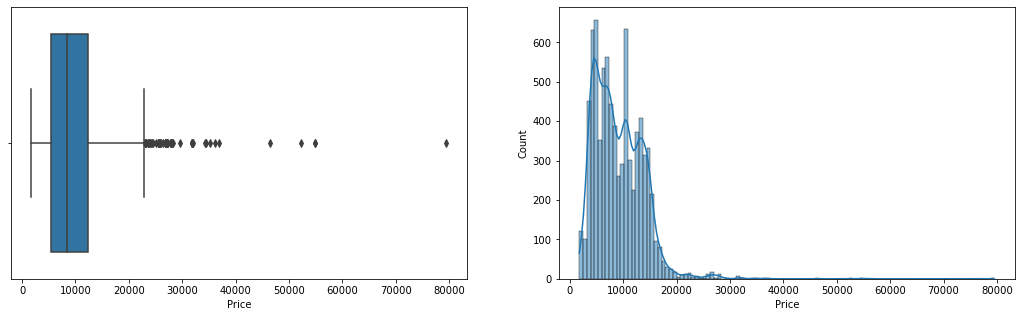

In [11]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,2)
sns.histplot(x = 'Price', data = df, kde = True)
plt.subplot(1,2,1)
sns.boxplot(x = 'Price', data = df)

# Exploration summary

* our dataset has nan values and duplicates
* Date_of_Journey,Dep_Time and Arrival_Time columns need to be casted into date time 
* uniforming duration column into minutes for better analysis and modeling
* Price column has outliers
* we need to add column for the class of the flight 

# data cleaning 

# Handling Price column 

In [12]:
col='Price'
q1 = df[col].quantile(0.25)
q3 = df[col].quantile(0.75)
iqr = q3 - q1
fence_low = q1 - (1.5*iqr)
fence_high = q3 + (1.5*iqr)
N_O_O = df.loc[(df[col] < fence_low) | (df[col] > fence_high)].shape[0]
df.loc[(df[col] < fence_low),col] = fence_low
df.loc[(df[col] > fence_high),col] = fence_high

<AxesSubplot:xlabel='Price'>

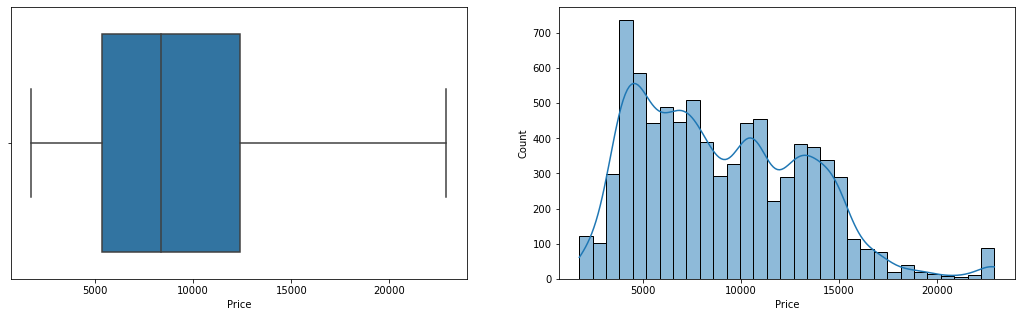

In [13]:
# conferming changes
plt.figure(figsize = (18,5))
plt.subplot(1,2,2)
sns.histplot(x = 'Price', data = df, kde = True)
plt.subplot(1,2,1)
sns.boxplot(x = 'Price', data = df)

In [14]:
# dropping nan values 
df=df.dropna()

# confirming changes
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [15]:
# dropping duplicated
df.drop_duplicates(inplace=True)

# confirming changes 
df.duplicated().sum()

0

In [16]:
df.shape

(7885, 11)

# casting time columns to datetime 

In [17]:
def change_into_datetime(col):
    df[col]=pd.to_datetime(df[col])

In [18]:
for i in ['Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)   

In [19]:
df.dtypes

Airline                    object
Date_of_Journey            object
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

# Handling Duration column

In [20]:
df['Duration']=  df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

# confirm changes 
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,9/06/2019,Kolkata,Banglore,CCU → BLR,2022-10-23 14:25:00,2022-10-23 16:55:00,150,non-stop,No info,5644
1,Vistara,6/03/2019,Mumbai,Hyderabad,BOM → DEL → HYD,2022-10-23 08:45:00,2022-03-07 09:25:00,1480,1 stop,No info,12395
2,IndiGo,3/04/2019,Banglore,Delhi,BLR → DEL,2022-10-23 06:05:00,2022-10-23 08:50:00,165,non-stop,No info,4077
3,Vistara,12/06/2019,Kolkata,Banglore,CCU → DEL → BLR,2022-10-23 17:00:00,2022-10-23 23:25:00,385,1 stop,No info,8610
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → DEL,2022-10-23 10:05:00,2022-10-23 13:00:00,175,non-stop,No info,10067


In [21]:
df['Duration'].unique()

array([ 150, 1480,  165,  385,  175,  140,  520, 1555,  750,  895, 1025,
        860, 2240, 1440,  170, 1405,  440,  160,  375,  740,  335,  135,
        490, 1090,  920,  270,  660, 1495, 1120,  505,  865,  720,  675,
        380,  545, 1470,  735,  575,  690,  840,  155, 1520,  910,  565,
        450,  705,  535, 1005,  315,  390,  845,  590,  195, 1745, 1295,
        965,  560, 1365,  345,  875,  975,  180,   85,  290,  800,  145,
       1325, 1380,  355,  810,  240,  680, 1145, 1705,  570, 1300, 1215,
       1320, 1265,  360, 1285,  715,  955,  435,  730, 1430, 1620,  530,
       1385, 1730,  460,  475, 2820,   90,  190,  465,  710,  780, 1000,
        325, 1560, 1425,  655,  480, 1110,  295, 1655,  615,  790,  220,
       1195, 1600,  830, 1355, 1100, 1255,  765, 1580,  420,  685,  900,
        400,  890,  310,  330,  370, 2280, 1615, 1420, 1010, 1125, 1410,
       1545,  755,  185,  725, 2245,  620,  455, 1050,  485,   80,  500,
        960, 1485, 1595,  930,  665,  695, 1035,  5

* it seems we have flight that its duration is 5 min! so we will drop it

In [22]:
df['Duration']=df['Duration'].replace(to_replace=5,value=None)
df=df.dropna()

In [23]:
# casting date of journey to datetime
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'], format = "%d/%m/%Y")

In [24]:
df['Date_of_Journey'].head(10)

0   2019-06-09
1   2019-03-06
2   2019-04-03
3   2019-06-12
4   2019-03-01
5   2019-03-18
6   2019-05-15
7   2019-03-01
8   2019-06-12
9   2019-05-06
Name: Date_of_Journey, dtype: datetime64[ns]

In [25]:
# extracting the month and the day from date of journey
df['journey_day']=df['Date_of_Journey'].dt.day
df['journey_month']=df['Date_of_Journey'].dt.month

In [26]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-06-09,Kolkata,Banglore,CCU → BLR,2022-10-23 14:25:00,2022-10-23 16:55:00,150,non-stop,No info,5644,9,6
1,Vistara,2019-03-06,Mumbai,Hyderabad,BOM → DEL → HYD,2022-10-23 08:45:00,2022-03-07 09:25:00,1480,1 stop,No info,12395,6,3
2,IndiGo,2019-04-03,Banglore,Delhi,BLR → DEL,2022-10-23 06:05:00,2022-10-23 08:50:00,165,non-stop,No info,4077,3,4
3,Vistara,2019-06-12,Kolkata,Banglore,CCU → DEL → BLR,2022-10-23 17:00:00,2022-10-23 23:25:00,385,1 stop,No info,8610,12,6
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → DEL,2022-10-23 10:05:00,2022-10-23 13:00:00,175,non-stop,No info,10067,1,3


In [27]:
# Then there will be no use of 'Date_of_Journey' column,so we drop it.
df.drop('Date_of_Journey', axis=1, inplace=True)

From Arrival_time and Dept_time columns,we extract hour and minutes and stored in new columns and drop these columns

In [28]:
df['Arrival_Time'+'_hour']=df['Arrival_Time'].dt.hour
df['Arrival_Time'+'_min']=df['Arrival_Time'].dt.minute

In [29]:
df['Dep_Time'+'_hour']=df['Dep_Time'].dt.hour
df['Dep_Time'+'_min']=df['Dep_Time'].dt.minute

In [30]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min
0,IndiGo,Kolkata,Banglore,CCU → BLR,2022-10-23 14:25:00,2022-10-23 16:55:00,150,non-stop,No info,5644,9,6,16,55,14,25
1,Vistara,Mumbai,Hyderabad,BOM → DEL → HYD,2022-10-23 08:45:00,2022-03-07 09:25:00,1480,1 stop,No info,12395,6,3,9,25,8,45
2,IndiGo,Banglore,Delhi,BLR → DEL,2022-10-23 06:05:00,2022-10-23 08:50:00,165,non-stop,No info,4077,3,4,8,50,6,5
3,Vistara,Kolkata,Banglore,CCU → DEL → BLR,2022-10-23 17:00:00,2022-10-23 23:25:00,385,1 stop,No info,8610,12,6,23,25,17,0
4,IndiGo,Banglore,New Delhi,BLR → DEL,2022-10-23 10:05:00,2022-10-23 13:00:00,175,non-stop,No info,10067,1,3,13,0,10,5


In [31]:
# dropping Dep_Time and Arrival_Time columns
df.drop('Arrival_Time',axis=1,inplace=True)
df.drop('Dep_Time',axis=1,inplace=True)

In [32]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min
0,IndiGo,Kolkata,Banglore,CCU → BLR,150,non-stop,No info,5644,9,6,16,55,14,25
1,Vistara,Mumbai,Hyderabad,BOM → DEL → HYD,1480,1 stop,No info,12395,6,3,9,25,8,45
2,IndiGo,Banglore,Delhi,BLR → DEL,165,non-stop,No info,4077,3,4,8,50,6,5
3,Vistara,Kolkata,Banglore,CCU → DEL → BLR,385,1 stop,No info,8610,12,6,23,25,17,0
4,IndiGo,Banglore,New Delhi,BLR → DEL,175,non-stop,No info,10067,1,3,13,0,10,5


# adding class column 

In [33]:
df['Airline']=df['Airline'].replace(to_replace=['Vistara Premium economy'],value='Vistara , Premium economy')
new=df["Airline"].str.split(' ',n=2,expand=True)
new[2].value_counts()
new[2]=new[2].fillna('economy')
df['class']=new[2]

In [34]:
# adjusting Airline column
df['Airline']=df['Airline'].replace(to_replace=['Vistara , Premium economy'],value='Vistara')
df['Airline']=df['Airline'].replace(to_replace=['Multiple carriers Premium economy'],value='Multiple carriers')
df['Airline']=df['Airline'].replace(to_replace=['Jet Airways Business'],value='Jet Airways')


# Data visualization 

# EDA question

* which airline has the biggest number of flights?
* Does price vary with airline?
* Does the number of stops influences the price?
* Does the price change with the duration of the flight?
* which month has the biggest number of flights?
* which month has the highest price?
* What is the effect of additional info on prices based on companies?
* which flights are the most expensive & the cheapest?

# which airline has the biggest number of flights?

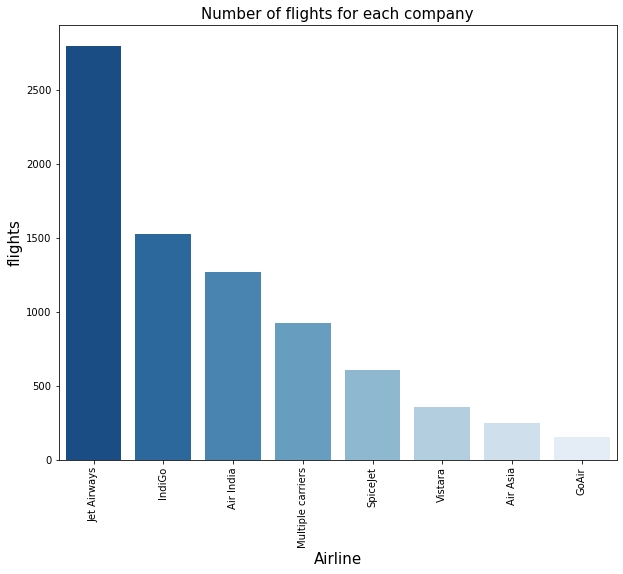

In [35]:
plt.figure(figsize=(10,8))
sns.countplot(df['Airline'],palette='Blues_r',order=df['Airline'].value_counts().index)
plt.title('Number of flights for each company',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('flights',fontsize=15)
plt.xticks(rotation=90)
plt.show()

 Jet Airways has the biggest number of flights

# Does price vary with airline?

we noticed that airline column has some airlines that their tickets for business or premium economy class, so we will only compare the same kind of tickets

In [36]:
Airline_meanPrices=df.groupby(['Airline','class'])['Price'].mean().reset_index()
Airline_meanPrices.sort_values(by=['Price'])

,Airline,class,Price
8,SpiceJet,economy,4358.511551
0,Air Asia,economy,5573.275304
3,IndiGo,economy,5682.953564
2,GoAir,economy,5733.677632
10,Vistara,economy,7837.025568
9,Vistara,Premium economy,8962.333333
1,Air India,economy,9595.621260
7,Multiple carriers,economy,10830.735005
6,Multiple carriers,Premium economy,10989.000000
5,Jet Airways,economy,11516.620665


Jet airway seems to have the highest prices for economy and business

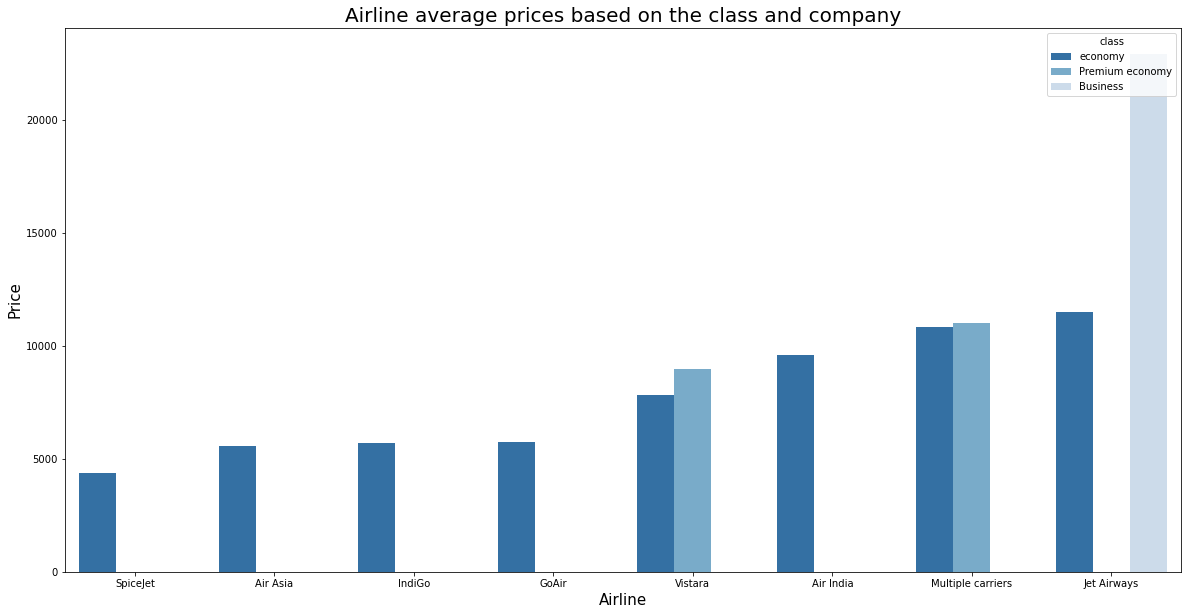

In [37]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Airline',y='Price',hue="class",data=Airline_meanPrices.sort_values("Price"),palette='Blues_r').set_title('Airline average prices based on the class and company',fontsize=20)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

* Business flights are only available in Jet airways
* Premium economy flights are only available in vistara and Multiple carriers
* there is a big gap between the prices in the two class(business and economy) in jet airrways
* there is slight difference between premium economy and economy in vistara and multiple carriers
* jet airways has the highest prices and spicejet is the cheapest

# Does the number of stops influences the price?
we will compare the same kind of tickets 

In [38]:
# making data frame for economy tickits
df3=df.groupby(['Airline','Total_Stops','class'])['Price'].aggregate('mean').reset_index()
df4=df3.loc[df3['class']=='economy']
df4.sort_values(by=['Price'])

,Airline,Total_Stops,class,Price
23,SpiceJet,non-stop,economy,3791.558704
2,Air Asia,non-stop,economy,4538.964029
12,IndiGo,non-stop,economy,4696.983498
9,GoAir,non-stop,economy,4770.068493
7,Air India,non-stop,economy,5550.659864
17,Jet Airways,non-stop,economy,6257.410480
1,Air Asia,2 stops,economy,6341.888889
26,Vistara,non-stop,economy,6353.720812
8,GoAir,1 stop,economy,6624.101266
22,SpiceJet,1 stop,economy,6859.178571


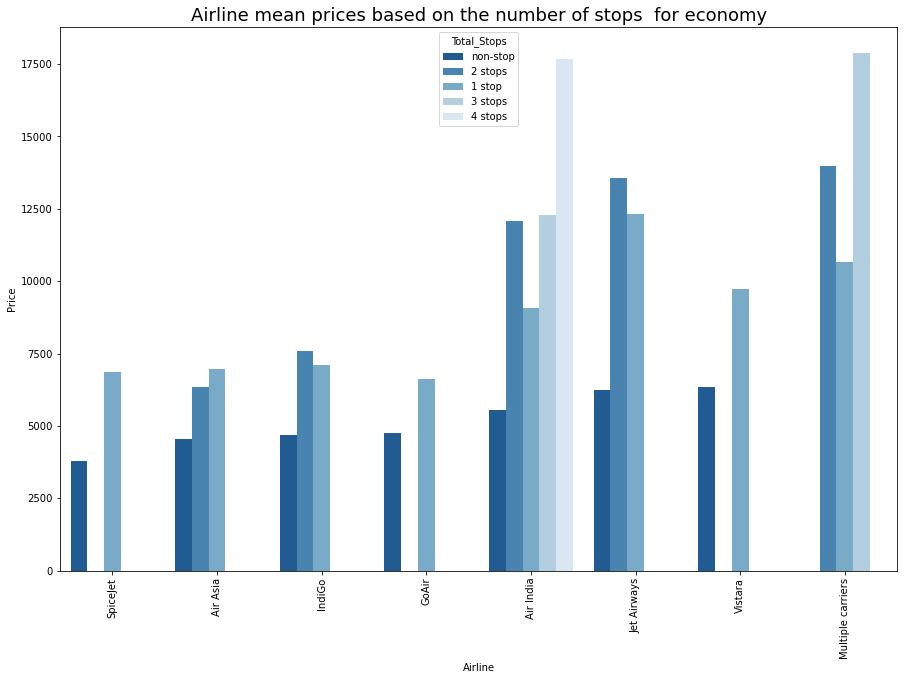

In [39]:
plt.figure(figsize=(15,10))
ax=sns.barplot(y = "Price", x = "Airline",hue="Total_Stops",data =df4.sort_values("Price"),palette='Blues_r')
plt.title("Airline mean prices based on the number of stops  for economy",fontsize=18)
plt.xticks(rotation=90)
plt.show()

* non_stops have the lowest price in all companies
* prices seem don't depend on number of stops

In [40]:
# making data frame for higher classes
df5=df3.loc[(df3['class']!='economy')]
df5.sort_values(by=['Price'])

,Airline,Total_Stops,class,Price
25,Vistara,non-stop,Premium economy,8962.333333
18,Multiple carriers,1 stop,Premium economy,10989.000000
13,Jet Airways,1 stop,Business,22906.000000
15,Jet Airways,2 stops,Business,22906.000000


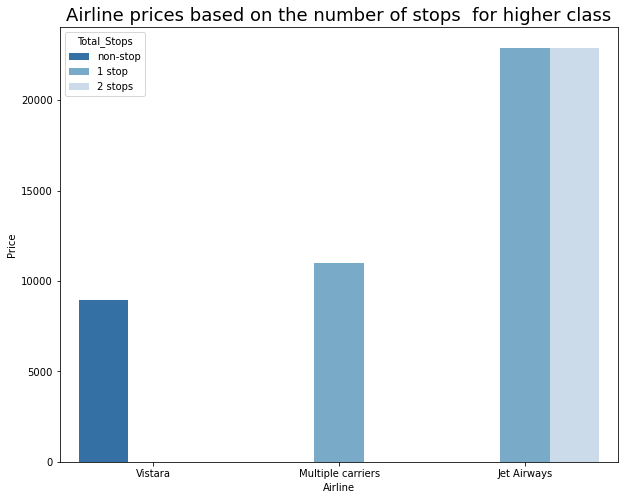

In [41]:
plt.figure(figsize=(10,8))
ax=sns.barplot(y = "Price", x = "Airline",hue="Total_Stops",data =df5.sort_values(by=['Price']),palette='Blues_r')
plt.title("Airline prices based on the number of stops  for higher class",fontsize=18)
plt.show()

* number of stops don't affect Jet AirWays prices

# Does ticket price change based on the departure time and arrival time?

In [42]:
# we will devide the departure time and arrival time into categories
df['Dep_Time_h']=pd.cut(x=df['Dep_Time_hour'], bins=[0,5,12,17,23],labels=['night','moarning','after noon','evening'])
df['Arrival_Time_h']=pd.cut(x=df['Arrival_Time_hour'], bins=[0,5,12,18,23],labels=['night','moarning','after noon','evening'])

Text(0.5, 1.0, 'Airline prices based on the arrival time')

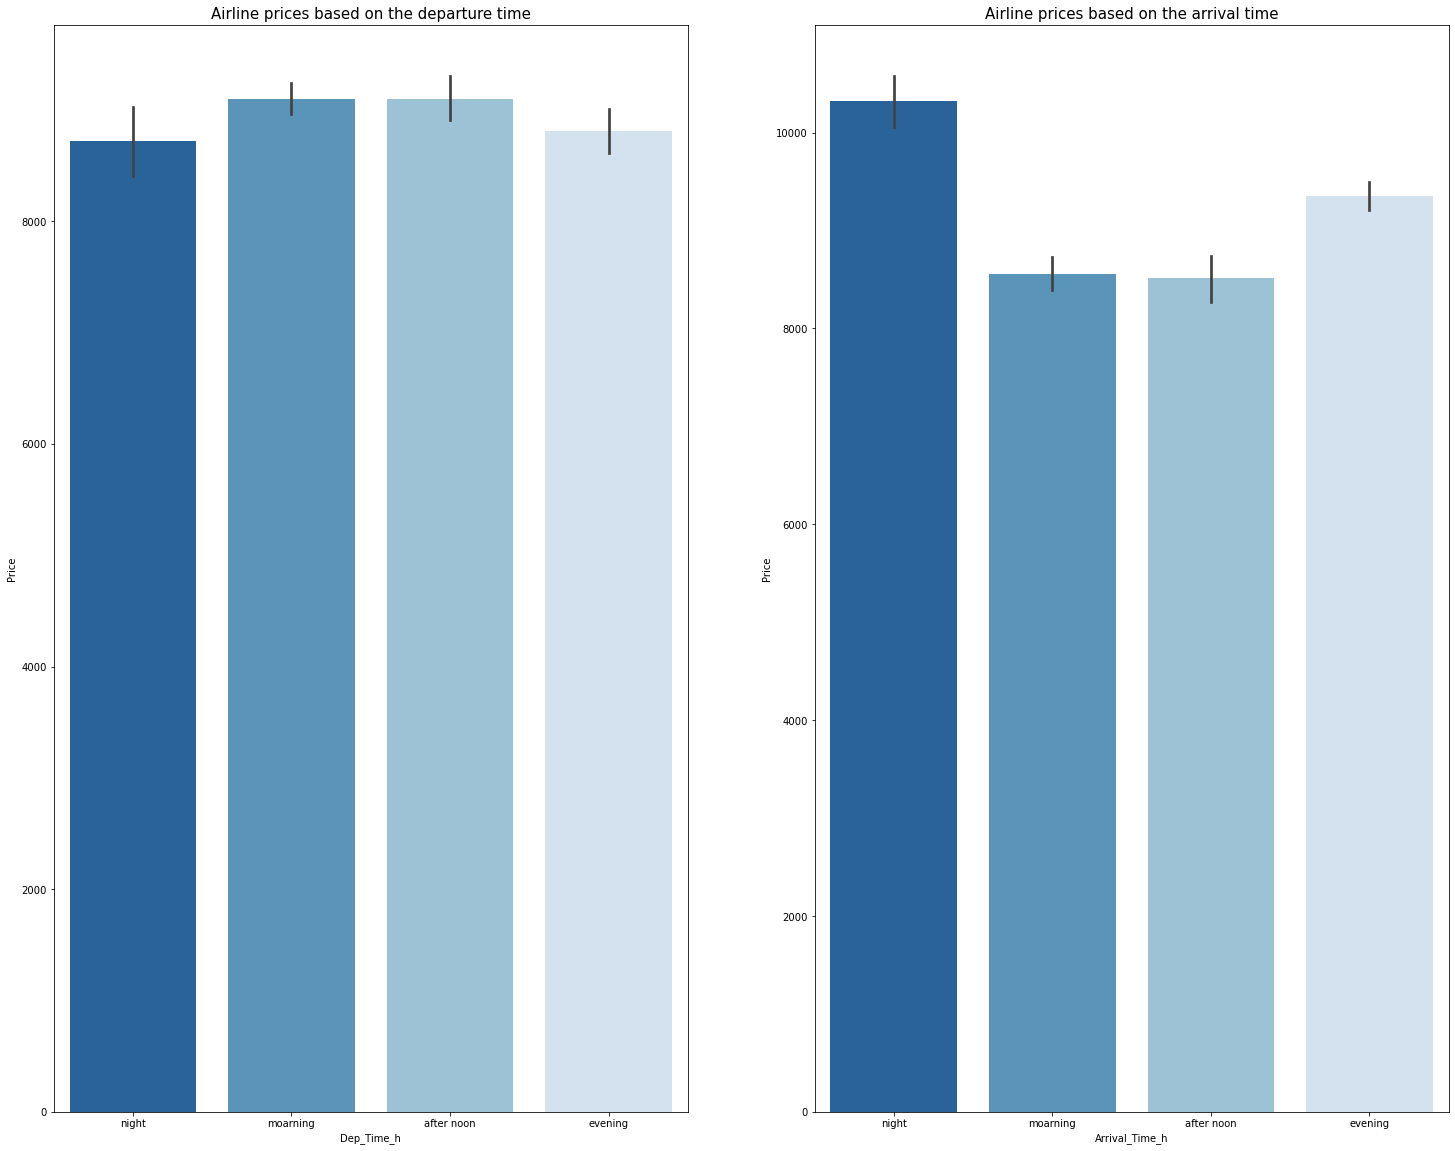

In [43]:
plt.figure(figsize = (25,20))
plt.subplot(1,2,1)
sns.barplot(data=df, y="Price", x="Dep_Time_h",palette='Blues_r').set_title("Airline prices based on the departure time",fontsize=15)
plt.subplot(1,2,2)
sns.barplot(data=df, y="Price", x="Arrival_Time_h",palette='Blues_r').set_title("Airline prices based on the arrival time",fontsize=15)

 leaving at night is the cheapest way to travel. But it's also visible that arriving morning and afternoon is also cheap.

# Does the price change with the duration of the flight?

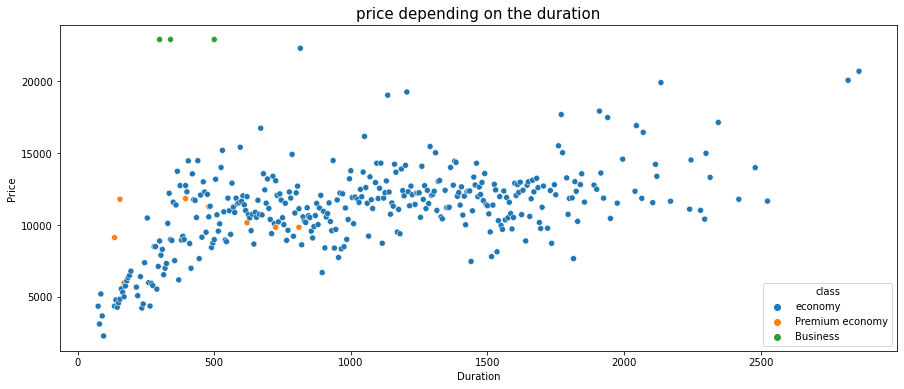

In [44]:
df2= df.groupby(['Duration','class'])['Price'].mean().reset_index()
df7=df2.loc[df2['class']=='economy']
plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="Duration", y="Price",hue='class', data=df2).set_title("price depending on the duration",fontsize=15)

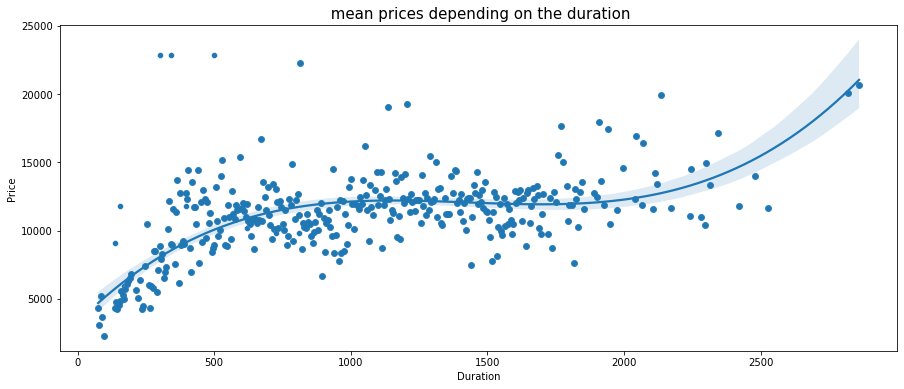

In [45]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="Duration", y="Price", data=df2).set_title(" mean prices depending on the duration",fontsize=15)
ax = sns.regplot(x="Duration", y="Price", data=df7,order=3)

It is clear that here the relationship is not linear.However some outliers seem to affect the regression curve. prices begin to get higher at 500 minuts and get lower and higher again  

# which month has the biggest number of flights?

In [46]:
buzMonth=df['journey_month'].value_counts()
buzMonth

5    2572
6    2485
3    2033
4     794
Name: journey_month, dtype: int64

May has the biggest number of flights

# which month has the highest price?

In [47]:
mean_price_inmonth=df.groupby(['journey_month','Airline'])['Price'].mean().reset_index()
mean_price_inmonth.sort_values('Price')

,journey_month,Airline,Price
30,6,SpiceJet,3980.124260
22,5,SpiceJet,4074.105820
14,4,SpiceJet,4199.126050
11,4,IndiGo,4729.392694
8,4,Air Asia,4880.100000
26,6,GoAir,4925.560000
10,4,GoAir,4935.096774
27,6,IndiGo,5155.787554
16,5,Air Asia,5183.783133
19,5,IndiGo,5256.570093


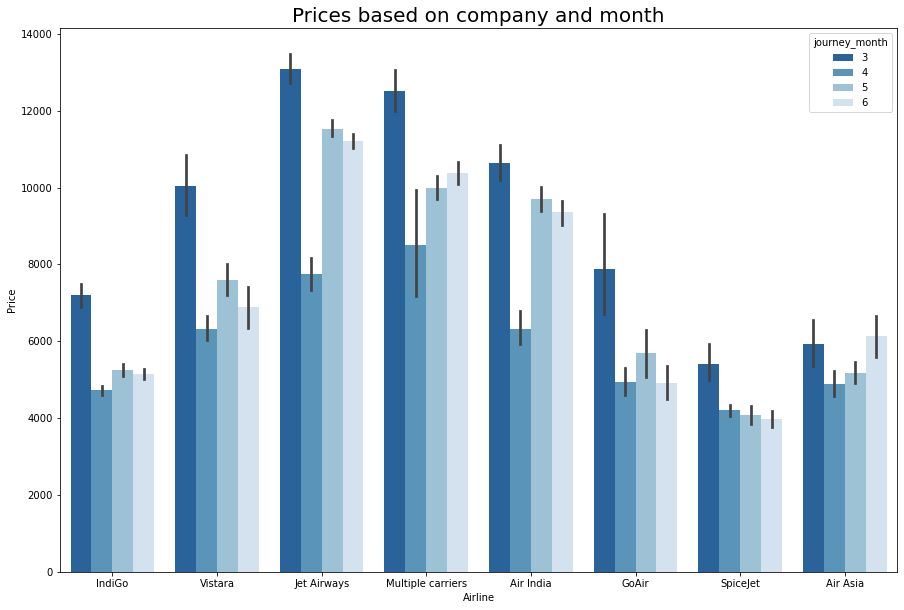

In [48]:
plt.figure(figsize=(15,10))
sns.barplot(y = "Price", x = "Airline",hue= 'journey_month',data =df,palette='Blues_r')
plt.title("Prices based on company and month",fontsize=20)
plt.show()

* March is the most expensive month for all companies except Air Asia(June month)
* April is the cheapet month for all companies except spicejet(june month)

# What is the effect of additional info on prices based on companies?

In [49]:
ndf= df.groupby(['Additional_Info','Airline'])['Price'].mean().reset_index()
ndf.sort_values('Price')

,Additional_Info,Airline,Price
10,No check-in baggage included,SpiceJet,3618.289157
17,No info,SpiceJet,4866.741573
11,No info,Air Asia,5551.731707
14,No info,IndiGo,5678.310616
13,No info,GoAir,5733.677632
2,1 Long layover,SpiceJet,7744.000000
18,No info,Vistara,7846.535211
9,No Info,IndiGo,8044.666667
8,In-flight meal not included,Multiple carriers,9365.477612
7,In-flight meal not included,Jet Airways,9466.039625


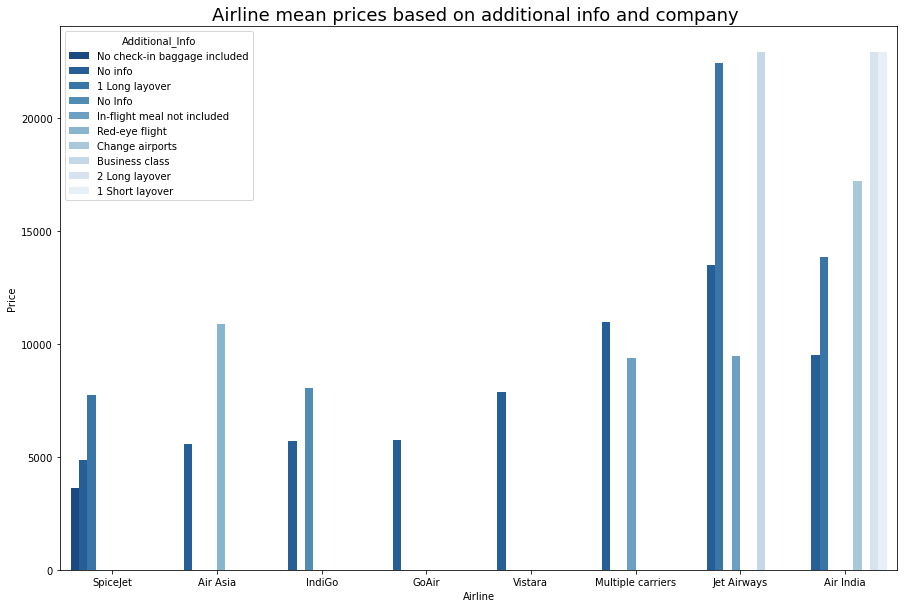

In [50]:
plt.figure(figsize=(15,10))
ax=sns.barplot(y = "Price", x = "Airline",hue="Additional_Info",data =ndf.sort_values("Price"),palette='Blues_r')
plt.title("Airline mean prices based on additional info and company ",fontsize=18)
plt.show()

* No check in baggage included makes price get lower
* layover makes prices get higher
* in flight_meal not included makes price get lower 
* air asia the only company that has red_eye flight and its price is high 
* air india the only company that has change airports flight and its price is high 

# which flights are the most expensive & the cheapest?

In [51]:
ndf= df.groupby(['Source','Destination'])['Price'].mean().reset_index()
ndf.sort_values('Price')

,Source,Destination,Price
2,Chennai,Kolkata,4772.208791
5,Mumbai,Hyderabad,4963.076772
0,Banglore,Delhi,5125.410560
4,Kolkata,Banglore,9155.822796
3,Delhi,Cochin,10436.198247
1,Banglore,New Delhi,11296.835479


* the most expensive flights is from Banglore to New Delhi 
* the cheapest flights is from chennai to Kolkata 

# Modeling

# preparing our train and test data 

In [52]:
# reading the data again for a compact clean preparation
df = pd.read_csv('Train set.csv')
sdf = pd.read_csv('Test set.csv')

In [53]:
#defined a function that takes a duration string and returns the number of minutes
def tominutes(x):
    x = str(x).split()
    m, h = 0, 0
    for i in x:
        if 'h' in i:
            h = int(i[:-1])
        if 'm' in i:
            m = int(i[:-1])
    return h*60 + m

In [54]:
#defined a function that prepares the data to be fed into the model
def do(q, r = 6):
    
    #convert duration column to minutes
    q.Duration = q.Duration.apply(tominutes, convert_dtype=False)
    
    #convert Dep Time to DateTime
    from datetime import datetime
    q['Dep_DateTime'] = q.Date_of_Journey + ' ' + q.Dep_Time
    q.Dep_DateTime = pd.to_datetime(q.Dep_DateTime)

    #extract features from Route and dropping dependent columns
    q = pd.concat([q, q.Route.apply(lambda x: pd.Series(str(x).split(' → ')))], axis=1)

    #save the arrival_time column

    #extract features from Dep_DateTime in minutes
    q.Dep_DateTime = (q.Dep_DateTime-datetime(2019, 1, 1))/ np.timedelta64(1, 'm')

    #apply some dummies manually
    q.Total_Stops = q.Total_Stops.map({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4})
    q.Additional_Info = q.Additional_Info.map({'No info':0, 'In-flight meal not included':1, 'No check-in baggage included':2, '1 Long layover':3, 'Change airports':4, 'Business class':5, '2 Long layover':6, 'Red-eye flight':7})
    q.Airline = q.Airline.map({'IndiGo': 0, 'Vistara': 1, 'Jet Airways': 2, 'Multiple carriers': 3, 'Air India': 4, 'GoAir': 5, 'SpiceJet': 6, 'Air Asia': 7, 'Multiple carriers Premium economy': 8, 'Jet Airways Business': 9, 'Vistara Premium economy': 10, 'Trujet': 11})
    ddict = {'BOM': 1, 'BLR': 2, 'MAA': 3, 'DEL': 4, 'JAI': 5, 'NAG': 6, 'AMD': 7, 'JDH': 8, 'HYD': 9, 'PNQ': 10, 'GAU': 11, 'COK': 12, 'IDR': 13, 'BHO': 14, 'IXC': 15, 'BDQ': 16, 'LKO': 17, 'BBI': 18, 'IXB': 19, 'RPR': 20, 'IXU': 21, 'ATQ': 22, 'GWL': 23, 'GOI': 24, 'IXR': 25, 'KNU': 26, 'DED': 27, 'TRV': 28, 'VGA': 29, 'VNS': 30, 'HBX': 31, 'UDR': 32, 'IXZ': 33, 'PAT': 34, 'STV': 35, 'IXA': 36, 'NDC': 37, 'IMF': 38, 'ISK': 39, 'VTZ': 40, 'CCU': 41}
    for i in range(0, r):
        q[i] = q[i].map(ddict)


    q.Arrival_Time = pd.to_datetime(q.Arrival_Time)
    q.Date_of_Journey = pd.to_datetime(q.Date_of_Journey, format='%d/%m/%Y')
    q['Arrival_Time'+'_hour']=q['Arrival_Time'].dt.hour
    q['Arrival_Time'+'_min']=q['Arrival_Time'].dt.minute
    q['Month_of_Journey']=q['Date_of_Journey'].dt.month
    q['Day_of_Journey']=q['Date_of_Journey'].dt.day
    q.drop(['Date_of_Journey', 'Dep_Time', 'Source', 'Destination', 'Route', 'Arrival_Time'], axis=1, inplace=True)

    q.fillna(0, inplace=True)
    q = q.astype('int')
    
    return q

In [55]:
cols_order = ['Airline','Duration', 'Total_Stops', 'Additional_Info', 'Dep_DateTime', 0, 1, 2, 3, 4, 'Arrival_Time_hour', 'Arrival_Time_min','Day_of_Journey','Month_of_Journey', 'Price']
df = do(df).drop([5], axis=1).reindex(columns=cols_order)
sdf = do(sdf, 5).reindex(columns= cols_order)
sdf.head()

,Airline,Duration,Total_Stops,Additional_Info,Dep_DateTime,0,1,2,3,4,Arrival_Time_hour,Arrival_Time_min,Day_of_Journey,Month_of_Journey,Price
0,4,1700,2,0,356245,41,1,12,2,0,13,45,9,5,NaN
1,7,165,0,0,206590,2,4,0,0,0,13,55,24,5,NaN
2,4,150,0,0,486135,41,2,0,0,0,16,45,12,4,NaN
3,2,1145,1,1,211290,4,1,12,0,0,12,35,27,5,NaN
4,2,1500,1,1,224220,41,4,2,0,0,18,0,6,5,NaN


In [56]:
df.head()

,Airline,Duration,Total_Stops,Additional_Info,Dep_DateTime,0,1,2,3,4,Arrival_Time_hour,Arrival_Time_min,Day_of_Journey,Month_of_Journey,Price
0,0,150,0,0,357985,41,2,0,0,0,16,55,9,6,5644
1,1,1480,1,0,220845,1,4,9,0,0,9,25,6,3,12395
2,0,165,0,0,89645,2,4,0,0,0,8,50,3,4,4077
3,1,385,1,0,489180,41,4,2,0,0,23,25,12,6,8610
4,0,175,0,0,3485,2,4,0,0,0,13,0,1,3,10067


### Scaling the data for better performance and splitting the data into train and test

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.values[:, :-1]
y = df.values[:, -1]

Xstd = StandardScaler().fit(X)
ystd = StandardScaler().fit(y.reshape(-1, 1))

X = Xstd.transform(X)
y = ystd.transform(y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Defining our to-be-used metrics

In [58]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error

### After some good trials and errors, we found that the best model -that we could get- is in the following structure:

In [59]:
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

es = [('xgb', XGBRegressor(reg_lambda = 1, n_estimators = 100, max_depth = 20, learning_rate = 0.1, tree_method = 'exact',num_parallel_tree = 4)), ('ada', AdaBoostRegressor(DecisionTreeRegressor(), n_estimators= 25, loss= 'exponential'))]
fe = SVR(kernel = 'rbf', C = 1000, gamma = 0.01)
model = StackingRegressor(estimators= es, n_jobs = -1, final_estimator= fe).fit(X_train, y_train.ravel())

### Applying the metrics, the moment of truth:

In [60]:
yt_pred = model.predict(X_train)
y_train, yt_pred = ystd.inverse_transform(y_train.reshape(-1, 1)), ystd.inverse_transform(yt_pred.reshape(-1, 1))
print(mean_absolute_error(y_train, yt_pred),
mean_squared_error(y_train, yt_pred),
r2_score(y_train, yt_pred))

101.87195923250191 1657612.6911662077 0.9234864794624045


In [61]:
y_pred = model.predict(X_test)
y_test, y_pred = ystd.inverse_transform(y_test.reshape(-1, 1)), ystd.inverse_transform(y_pred.reshape(-1, 1))
print(mean_absolute_error(y_test, y_pred),
mean_squared_error(y_test, y_pred),
r2_score(y_test, y_pred))

634.3509763939577 1701398.9625769162 0.9043953069195498


### Good enough, let's export the good stuff:

In [62]:
Xs = sdf.values[:, :-1]
Xs = Xstd.transform(Xs)
ys = model.predict(Xs)
ys = ystd.inverse_transform(ys.reshape(-1, 1))

In [63]:
ssdf = pd.DataFrame(ys, columns=['Price'])
ssdf.to_csv('submissiondttt.csv', index_label = 'Id')
ssdf

,Price
0,12573.248730
1,3445.336959
2,5474.706507
3,12902.061773
4,9439.825663
...,...
2666,8464.992277
2667,8352.584673
2668,4833.478679
2669,6202.065984


<h3>Summary</h3>
 
 * `Analysis`
   * Jet Airways has the biggest number of flights
   * Business flights are only available in Jet airways
   * Premium economy flights are only available in vistara and Multiple carriers
   * there is a big gap between the prices in the two class(business and economy) in jet airrways
   * there is slight difference between premium economy and economy in vistara and multiple carriers
   * jet airways has the highest prices and spicejet is the cheapest
   * leaving at night is the cheapest way to travel. But it's also visible that arriving morning and afternoon is also cheap.
   * March is the most expensive month for all companies except Air Asia(June month)
   * April is the cheapet month for all companies except spicejet(june month)
   * the most expensive flights is from Banglore to New Delhi 
   * the cheapest flights is from chennai to Kolkata 
* `Model`
   * we used DecisionTreeRegressor and XGBRegressor and applied stakingregressor on them 
   * we applied AdaBoostRegressor on DecisionTreeRegressor 
   * mean absolute error= 634.3509763939577 on train test 

<h3>Future Work</h3>

 * We could use Auto exploration 
 * We could use Auto_ml 
 * we could use Grid Search
 * A very good idea was to ask an expert, for example, an Indian person who's involved in the air travel business could have a great impact on how we understood and analyzed the data.  
